# STAGE 1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Refdinal/insight-hustler/refs/heads/master/data/aug_train.csv")

## 2.Descriptive Statistics

In [23]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3600,6397,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Funded Startup,>4,43,0.0
10445,23731,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,10000+,Pvt Ltd,1,92,0.0
17738,17615,city_28,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,10/49,Pvt Ltd,1,29,0.0
10638,16693,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,Arts,15,10000+,Pvt Ltd,>4,33,0.0
14125,9629,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,14,10000+,Pvt Ltd,4,166,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Berikut adalah ringkasan insight dari dataset:

1. **Jumlah Data**: Terdapat 19.158 entri, cukup untuk analisis.

2. **Data Hilang**:
   - `gender` (4.508 hilang)
   - `enrolled_university` (386 hilang)
   - `education_level` (460 hilang)
   - `major_discipline` (2.813 hilang)
   - `company_size` (6.938 hilang)
   - `company_type` (8.140 hilang)
   - `last_new_job` (423 hilang)

3. **Tipe Data**:
   - 2 kolom numerik (`float64` dan `int64`).
   - 10 kolom kategorikal (`object`).

4. **Variabel Target**: Kolom `target` menunjukkan status pendaftaran (1.0 untuk pindah pekerjaan, 0.0 untuk bertahan pada pekerjaan).

5. `city_development_index` merupakan index dari `city` yang nantinya salah satu kolom dapat didrop dan hanya menggunakan salah satunya


In [25]:
# Pengelompokan kolom berdasarkan jenis
nums= ['enrollee_id', 'city_development_index', 'training_hours', 'target']
cats=['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [26]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


- tidak ada missing values pada fitur numerik.
- terdapat potensi outlier pada feature training_hours dapat diidentifikasi karena nilai maksimum yang jauh lebih tinggi dibandingkan dengan kuartil bawah (Q1) dan kuartil atas (Q3).



In [27]:
df[cats].describe().T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [28]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom city:
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Value count kolom gender:
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

Value count kolom relevent_experience:
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Value count kolom enrolled_university:
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Value count kolom education_level:
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

Value count kolom major_discipline:
major_discipline
STEM               14492
Humanities           669
Other              



*   city_103 mendominasi sebagai lokasi pendaftar, menunjukkan potensi bahwa pendaftar mungkin memiliki akses yang lebih baik ke program di kota ini. Kota-kota lain memiliki entri yang jauh lebih sedikit, mungkin mencerminkan keterbatasan akses atau preferensi pendaftar.

*   terdapat ketidakseimbangan signifikan antara pendaftar pria dan wanita, dengan mayoritas pendaftar adalah pria. Ini mungkin mencerminkan bias dalam bidang yang ditekuni atau dalam proses pendaftaran itu sendiri.

- Sebagian besar pendaftar memiliki pengalaman relevan. Ini menunjukkan bahwa pendaftar yang mendaftar kemungkinan besar telah mendapatkan pelatihan atau pengalaman yang sesuai sebelumnya, meningkatkan peluang mereka untuk berhasil dalam program.

- Mayoritas pendaftar tidak terdaftar di universitas mana pun. Hal ini menunjukkan bahwa banyak pendaftar mungkin adalah individu yang mencari pengembangan lebih lanjut dalam karier mereka, meskipun tidak terdaftar dalam kursus formal.

- Mayoritas pendaftar memiliki gelar sarjana, dengan proporsi yang signifikan juga memiliki gelar master. Sangat sedikit yang memiliki gelar PhD, menunjukkan bahwa program ini mungkin lebih ditujukan untuk profesional awal hingga menengah.

- Disiplin STEM mendominasi, menunjukkan minat yang kuat dalam bidang teknologi dan sains. Ini mungkin menunjukkan bahwa program ini lebih menarik bagi mereka yang memiliki latar belakang teknis.

- Ada variasi yang luas dalam pengalaman kerja, dengan banyak pendaftar memiliki pengalaman kerja di atas 20 tahun. Ini menunjukkan bahwa program tersebut menarik bagi individu dari berbagai tahap dalam karier mereka

- Pendaftar cenderung berasal dari perusahaan kecil hingga menengah. Ini menunjukkan bahwa program ini mungkin lebih menarik bagi individu yang bekerja di lingkungan perusahaan yang lebih kecil, yang mungkin memiliki kebutuhan pelatihan yang lebih tinggi.

- Sebagian besar pendaftar berasal dari perusahaan swasta, menunjukkan bahwa individu dari sektor ini lebih banyak tertarik untuk mendaftar. Ini juga dapat mencerminkan tren di mana sektor swasta menawarkan lebih banyak peluang untuk pengembangan karier.

- Sebagian besar pendaftar baru saja pindah pekerjaan atau telah berganti pekerjaan lebih dari empat kali, menunjukkan dinamika karier yang tinggi di antara pendaftar. Hal ini bisa menjadi indikasi bahwa mereka sedang mencari peluang baru atau peningkatan dalam karier mereka.

- Terdapat Ketidakseimbangan Kelas: Kelas 0.0 (tidak berhasil) mendominasi, sementara kelas 1.0 (berhasil) jauh lebih sedikit. Ini menunjukkan bahwa model yang dilatih dengan data ini mungkin memiliki kecenderungan untuk memprediksi kelas mayoritas (0.0) dan bisa berisiko mengabaikan pola yang ada di kelas minoritas (1.0).



In [29]:
df.isna().sum()


,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938




### A. Tipe Data dan Nama Kolom
1. **Tipe Data:**
   - Semua kolom memiliki tipe data yang sesuai dengan isinya. Namun, ada beberapa kolom dengan tipe `object` yang mungkin lebih tepat diubah menjadi tipe data yang lebih spesifik jika diperlukan:
     - **`experience`** dan **`training_hours`**: Jika `experience` mewakili angka (misalnya, jumlah tahun pengalaman), pertimbangkan untuk mengonversinya ke tipe numerik. Untuk `training_hours`, meskipun sudah dalam tipe `int64`, pastikan nilainya sesuai dengan pengukuran yang diinginkan.
   
2. **Nama Kolom:**
   - Nama kolom terlihat jelas dan sesuai dengan isinya. Tidak ada kolom yang tampak tidak relevan atau kurang sesuai.



### B. Nilai Kosong
**Nilai Kosong**:
   - `gender` (4.508 hilang)
   - `enrolled_university` (386 hilang)
   - `education_level` (460 hilang)
   - `major_discipline` (2.813 hilang)
   - `company_size` (6.938 hilang)
   - `company_type` (8.140 hilang)
   - `last_new_job` (423 hilang)




### C. Nilai Summary yang Aneh
1. **`enrollee_id`:**
   - Min: 2, Max: 33380; cukup luas, tapi ini mungkin hanya menunjukkan variasi unik ID pendaftar.

2. **`city_development_index`:**
   - Nilai ini berada dalam rentang yang wajar (min: 0.448, max: 0.949) dan memiliki mean (0.844570) dan median (0.910000) yang menunjukkan sebaran yang cenderung normal.

3. **`training_hours`:**
   - Min: 1, Max: 336; meskipun rata-rata (65.074930) dan median (47) menunjukkan sebaran yang wajar, nilai maksimum 336 terlihat tinggi jika dibandingkan dengan median. Ini mungkin menunjukkan ada beberapa individu yang menerima pelatihan jauh lebih banyak dibandingkan yang lain.

4. **`target`:**
   - Min: 0, Max: 1; dengan mean (0.165606) dan median (0.000000) menunjukkan bahwa sebagian besar entri memiliki nilai target 0. Ini bisa menunjukkan bahwa dataset mungkin sangat tidak seimbang.


In [30]:
# df = df.dropna(axis=1)


## 2.Univariate Analysis

### Histogram

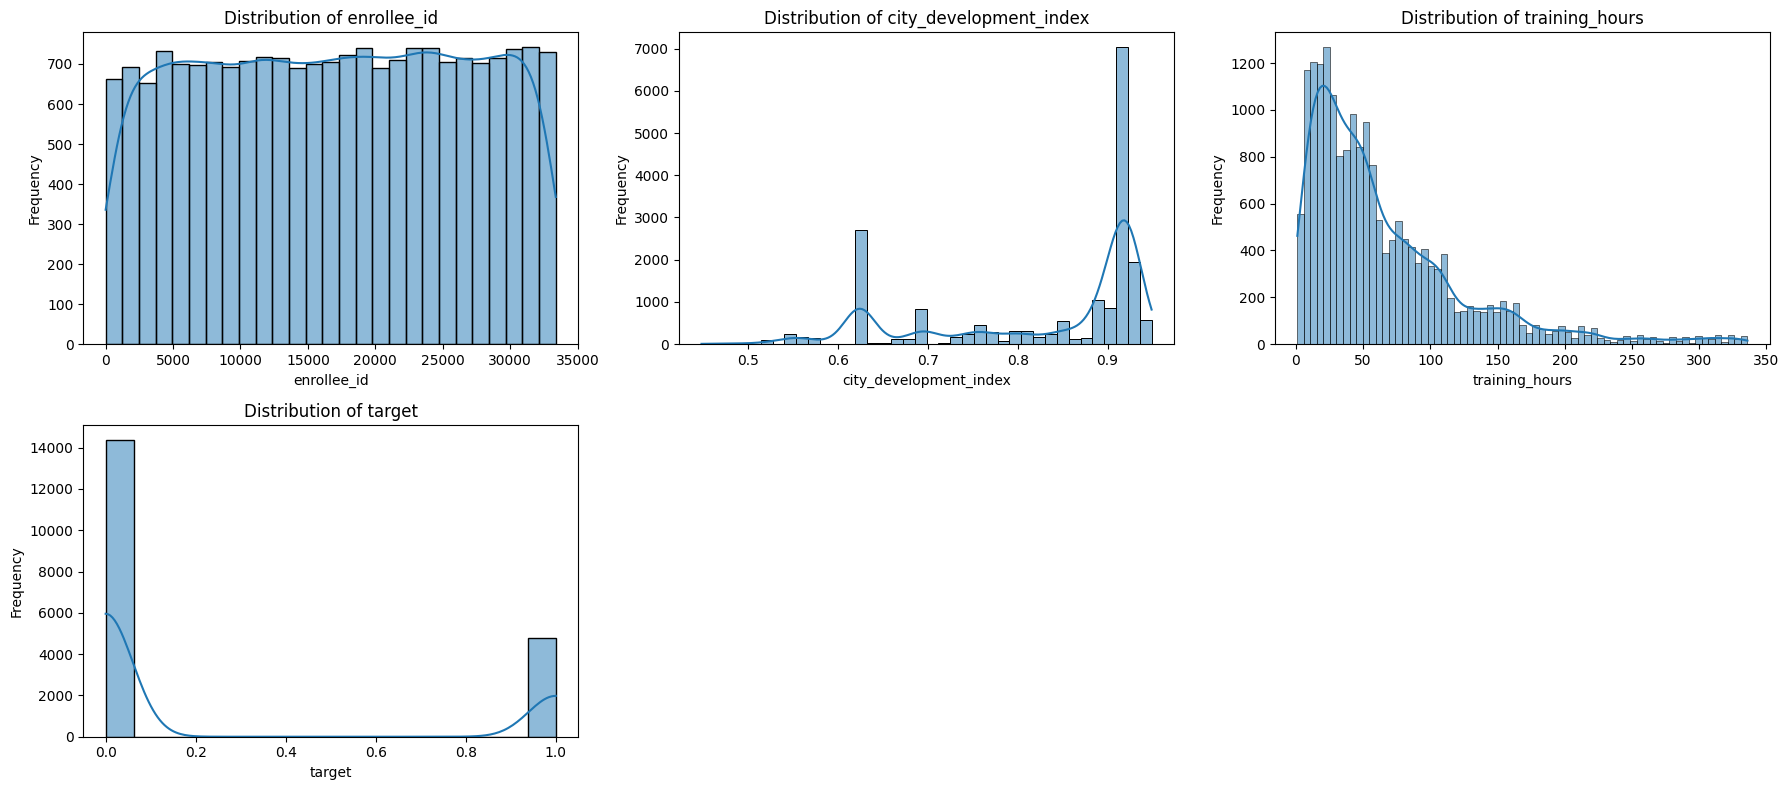

In [31]:

# Plot numerical features
n_cols = 3  # Number of columns per row
n_rows = (len(nums) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

for i, feature in enumerate(nums):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





Observasi :
1. Kolom `enrollee_id` hanya menunjukkan id unik tiap pekerja sehingga dapat didrop nantinya dalam pemilihan feature
2. Kolom `city_development_index` menujukkan distribusi bimodal tetapi cenderung ke negatif skewness yang akan dianalisa lebih lanjut pada multivariate analisis untuk melihat hubungannya dengan target
3. Kolom `training_hours` menunjukkan positif skewness dan outliernya akan dianalisis lebih lanjut dengan boxplot
4. Kolom `target` memiliki data yang imbalance yang kemungkinan akan dilakukan balancing dengan metode oversampling atau undersampling

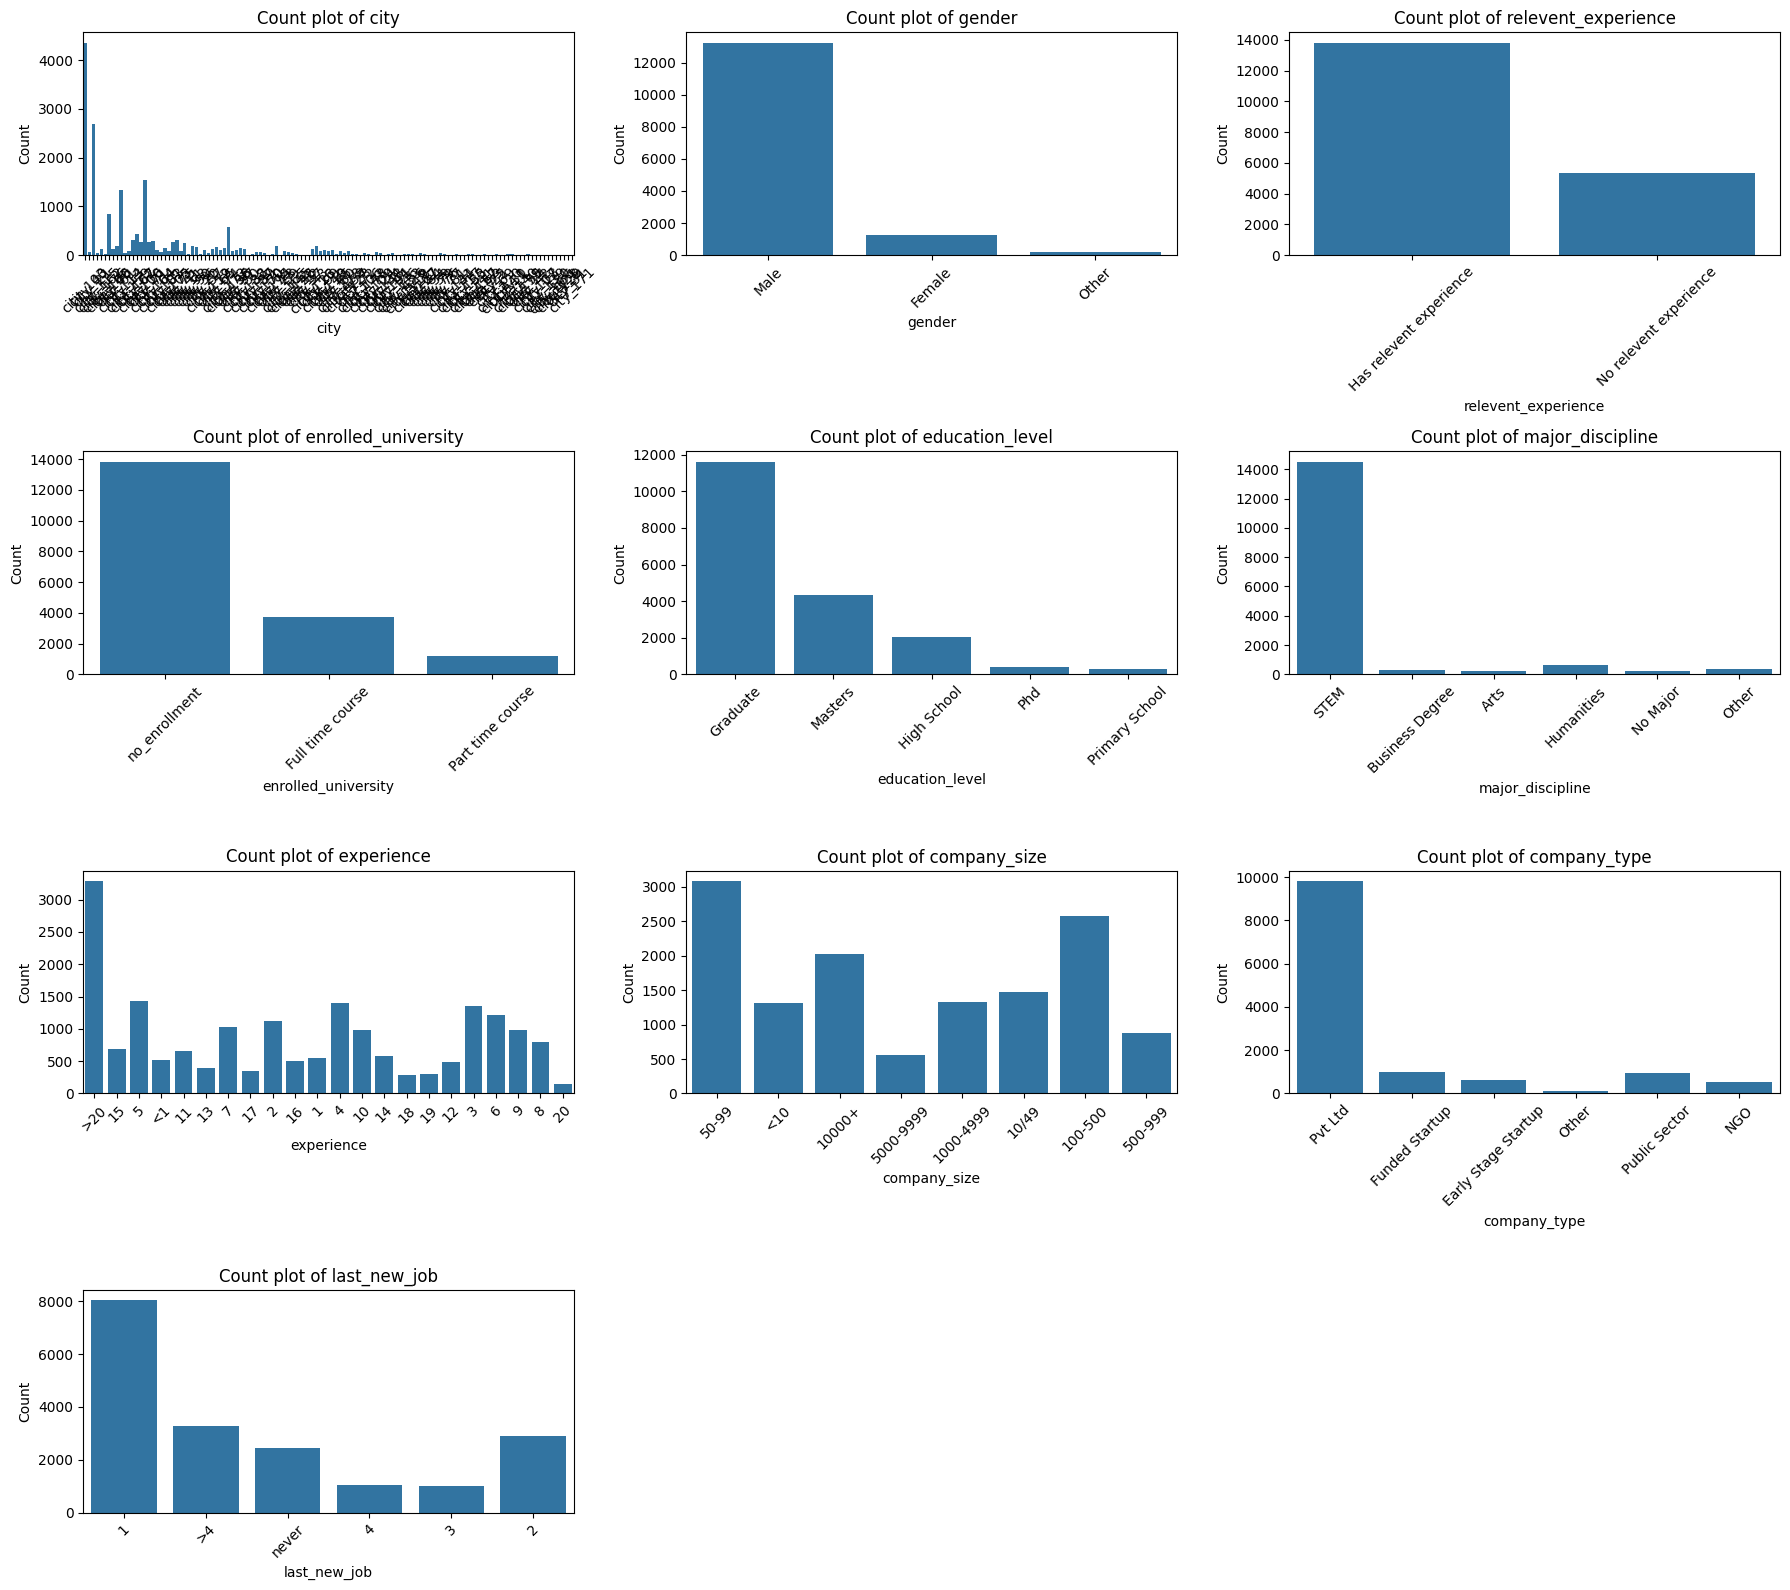

In [32]:
# Plot categorical features
n_rows = (len(cats) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

for i, feature in enumerate(cats):
    sns.countplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Count plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels by 45 degrees

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observasi :
1. Kolom `city` terlalu banyak kategori. Kolom ini dapat di drop saat featuring engineer dan menggunakan `city_development_index` sebagai feature numerik yang lebih baik
2. Kolom `gender` memiliki missing value yang cukup besar dan imbalance antara male dan female. direkomendasikan untuk menghapus saja fitur gender ini
3. Kolom `relevant_experience` memiliki mayoritas **Has relevant experience** dibandingkan **No relevant experience** . Dapat menggunakan one hot encoding pada fitur ini (1 untuk Has relevant experience, 0 untuk No relevant experience)
4. Kolom `enrolled university` memiliki 3 kategori tetapi dibutuhkan mulitvariate analisis lebih lanjut untuk mengetahui hubungan dengan target, dan juga dapat menggunakan one hot encoding untuk fitur ini
5. Kolom `education_level` memiliki 5 unik value. dengan tingkatan pendidikan direkomendasikan menggunakan **Ordinal Encoding**.
6. Kolom `major_discipline` mayoritas berada pada STEM . Dapat juga menggunakan one hot encoding pada fitur ini
7. Kolom `Experience` terbagi menjadi banyak kategory rentang tahun pengalaman. sebaiknya dapat dikelompokkan lebih kecil lagi jika menggunakan encoding
8. Kolom `company_size` dapat digunakan ordinal encoding dimulai dari yang kecil hingga besar
9. Kolom `company_type` dapat menggunakan one hot encoding. tetapi satu value cenderung lebih banyak dan direkomendasikan untuk menghapus kolom ini saja
10. kolom `last_new_job` dapat menggunakan ordinal encoding

### Boxplot

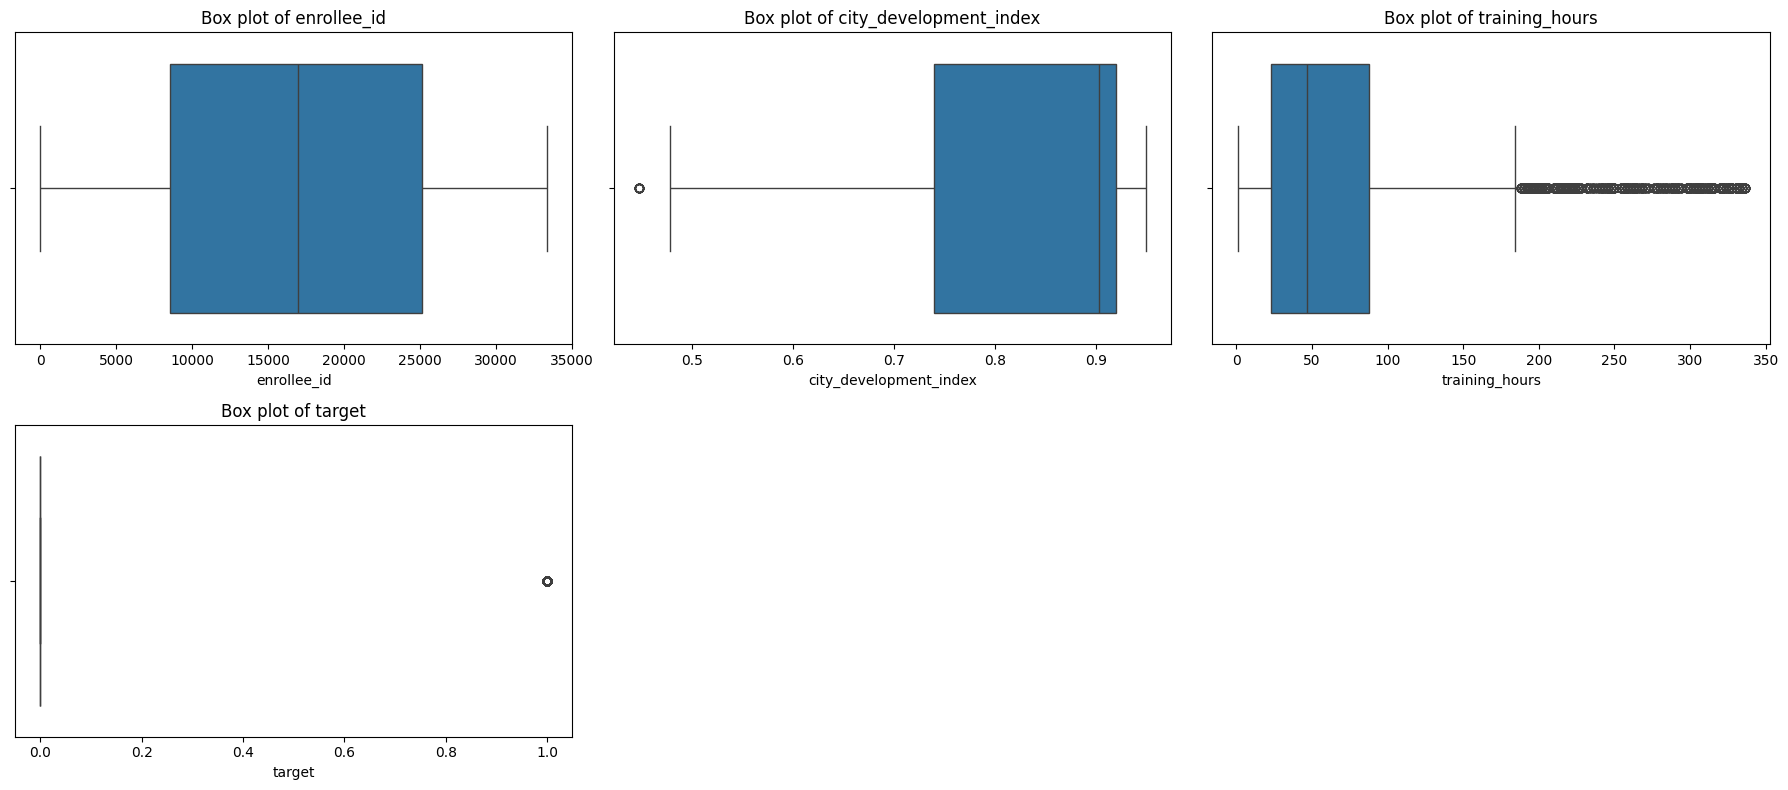

In [33]:
# Determine the number of rows needed for the plots
n_cols = 3  # Number of columns per row
n_rows = (len(nums) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))  # Adjust the figure size
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, feature in enumerate(nums):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_xlabel(feature)

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observasi :
1. Seperti analisa sebelumnya Kolom id akan didrop
2. `city_development_index` memiliki distribusi negatif skewed dan terdapat sedikit outlier pada data
3. `training_hours` memiliki banyak data outlier. lebih baik tetap menggunakan fitur ini dengan outlier. dan melakukan transformasi data dengan metode yang robust terhadap outlier

## 3.Multivariate Analysis

### Plot Numerical

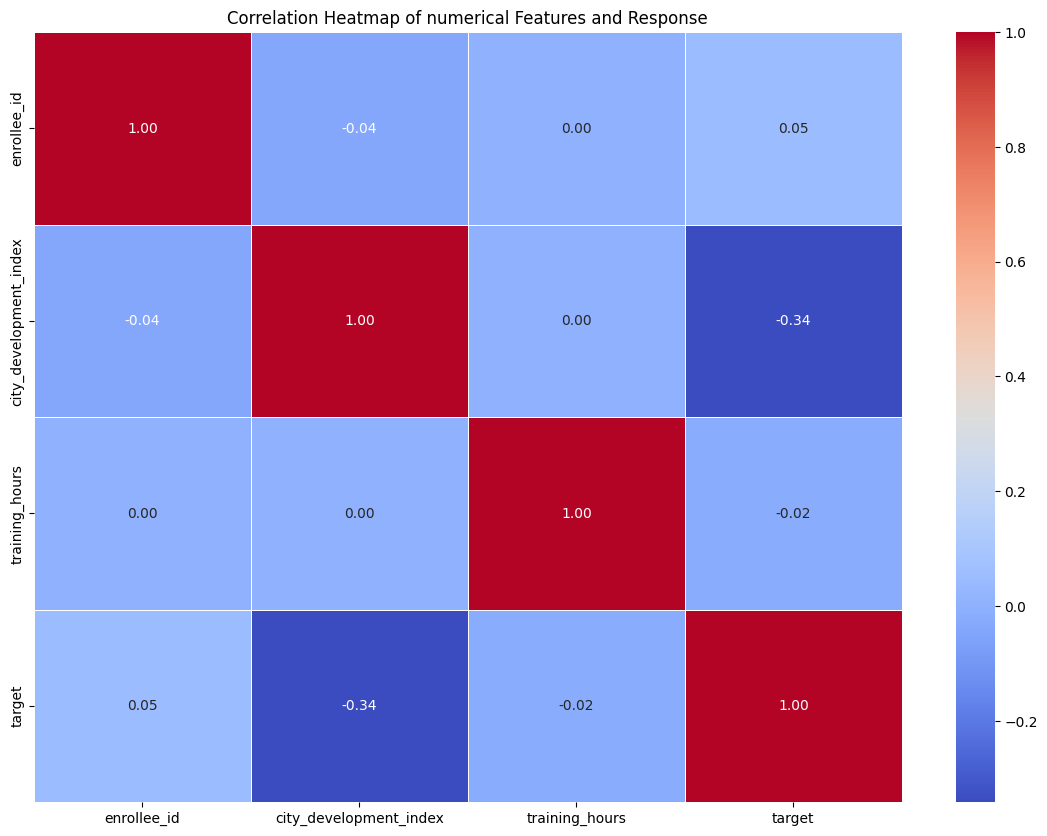

In [34]:
# Combine numerical features and the response feature
correlation_num = nums

# Calculate correlation matrix including the response feature
correlation_numerical = df[correlation_num].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_numerical, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of numerical Features and Response')
plt.show()

Observasi :
1. Korelasi antar fitur
- Fitur numerical memiliki korelasi yang sangat lemah antar fiturnya sehingga tidak ada multicolinearity
2. Korelasi antar fitur dan target
- Fitur city development index memiliki korelasi negatif yang cukup dengan target
- abaikan enrolled_id yang tidak akan digunakan sebagai predictor
- training hours memiliki korelasi negatif yang sangat lemah dengan target

Konversi Beberapa data ordinal ke numerical
- `city` = categorical
- `gender` = categorical
- `relevant_experience` = categorical
- `enrolled_university` = categorical
- `eduaction_level` = ordinal
- `major_discipline` = categorical
- `experience` = ordinal
- `company_size` = ordinal
- `company_type` = categorical
- `last_new_job` = ordinal

Data-data ordinal dapat dikonversi sementara untuk melihat korelasinya
1. **Education Level**
- Primary School = 1
- High School = 2
- Graduate = 3
- Masters = 4
- Phd = 5
2. **Experience**
- Entry Level: 0 - 2 tahun = 1
- Junior: 3 - 5 tahun = 2
- Mid Level: 6 - 10 tahun = 3
- Senior: 11 - 15 tahun = 4
- Expert: 16++  tahun = 5
3. **Company Size**
- < 50 => small = 1
- 50 - 99 => medium small = 2
- 100 - 500 => medium = 3
- 500 - 999 =>  large = 4
- 1000 - 4999 => very large = 5
- 5000 - 9999 => Corporate = 6
- 10000 => Large Corporate = 7
4. **last_new_job**
- never = 0
- 1 = 1
- 2 = 2
- 3 = 3
- 4 = 4
- 4+ = 5

In [35]:
df[df['experience']=='<1']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
23,7041,city_40,0.776,Male,Has relevent experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0
71,17271,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,never,18,1.0
74,29117,city_11,0.550,NaN,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,never,12,0.0
86,30937,city_57,0.866,Female,No relevent experience,Part time course,Graduate,STEM,<1,10/49,Pvt Ltd,2,83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19042,29449,city_128,0.527,NaN,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,1,19,1.0
19084,6808,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,NaN,NaN,1,42,0.0
19114,12539,city_21,0.624,NaN,No relevent experience,no_enrollment,Masters,STEM,<1,<10,NaN,>4,160,1.0
19125,20996,city_74,0.579,Male,No relevent experience,Full time course,Graduate,STEM,<1,NaN,NaN,never,31,0.0


In [36]:
# copy df untuk membuat dataframe baru yang akan dikonversi
df_temp = df.copy()
# ubah kolom-kolom kategorical ordinal dan ubah type data menjadi numerical
df_temp['education_level'] = df_temp['education_level'].replace({
    'Primary School': 1,
    'High School': 2,
    'Graduate': 3,
    'Masters': 4,
    'Phd': 5
}).astype(float)
df_temp['experience'] = df_temp['experience'].replace({
    '<1': 1,
    '2': 1,
    '3': 2,
    '4': 2,
    '5': 2,
    '6': 3,
    '7': 3,
    '8': 3,
    '9': 3,
    '10': 3,
    '11': 4,
    '12': 4,
    '13': 4,
    '14': 4,
    '15': 4,
    '16': 5,
    '17': 5,
    '18': 5,
    '19': 5,
    '20': 5,
    '>20': 5
}).astype(float)
df_temp['company_size'] = df_temp['company_size'].replace({
    '<10': 1,
    '10/49': 1,
    '50-99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}).astype(float)
df_temp['last_new_job'] = df_temp['last_new_job'].replace({
    'never': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5,

}).astype(float)


In [37]:
# gabungkan kolom yang sudah dikonversi ke numerical dengan nilai numerical sebelumnya tanpa enrollee_id
nums_temp = ['city_development_index','education_level',
       'experience', 'company_size',
       'last_new_job', 'training_hours', 'target']

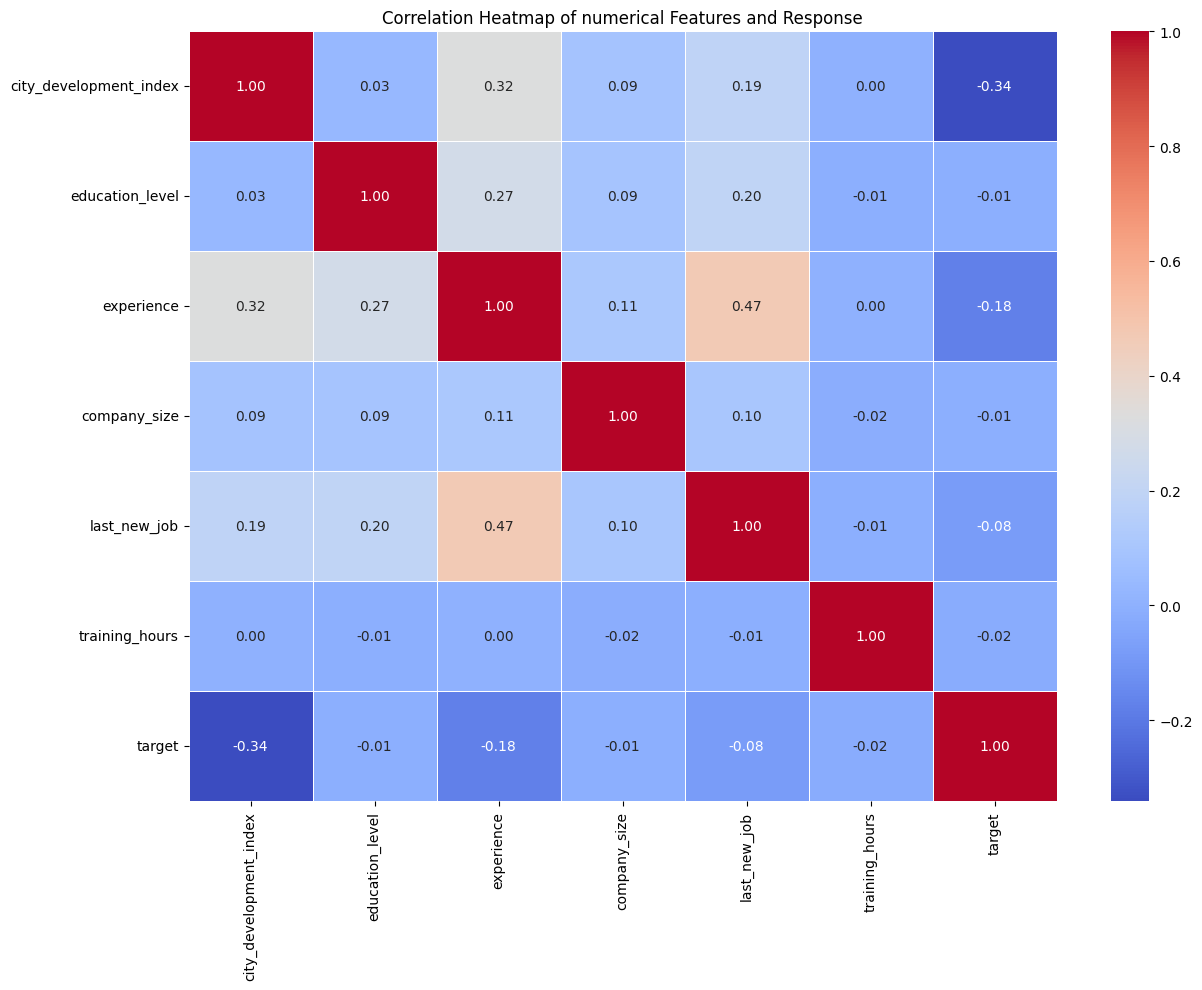

In [38]:
# Combine numerical features and the response feature

# Calculate correlation matrix including the response feature
correlation_numerical_temp = df_temp[nums_temp].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_numerical_temp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of numerical Features and Response')
plt.show()

Observasi :
1. Korelasi antar fitur
- Beberapa fitur memilik korelasi yang tinggi dengan fitur lain tetapi tidak ada yang menjadi multicolinearity
2. Korelasi antar fitur dan target
- Banyak fitur yang memiliki korelasi yang cukup besar dengan target seperti
`city_development_index`, `experience`dan fitur lain memiliki korelasi yang cukup lemah


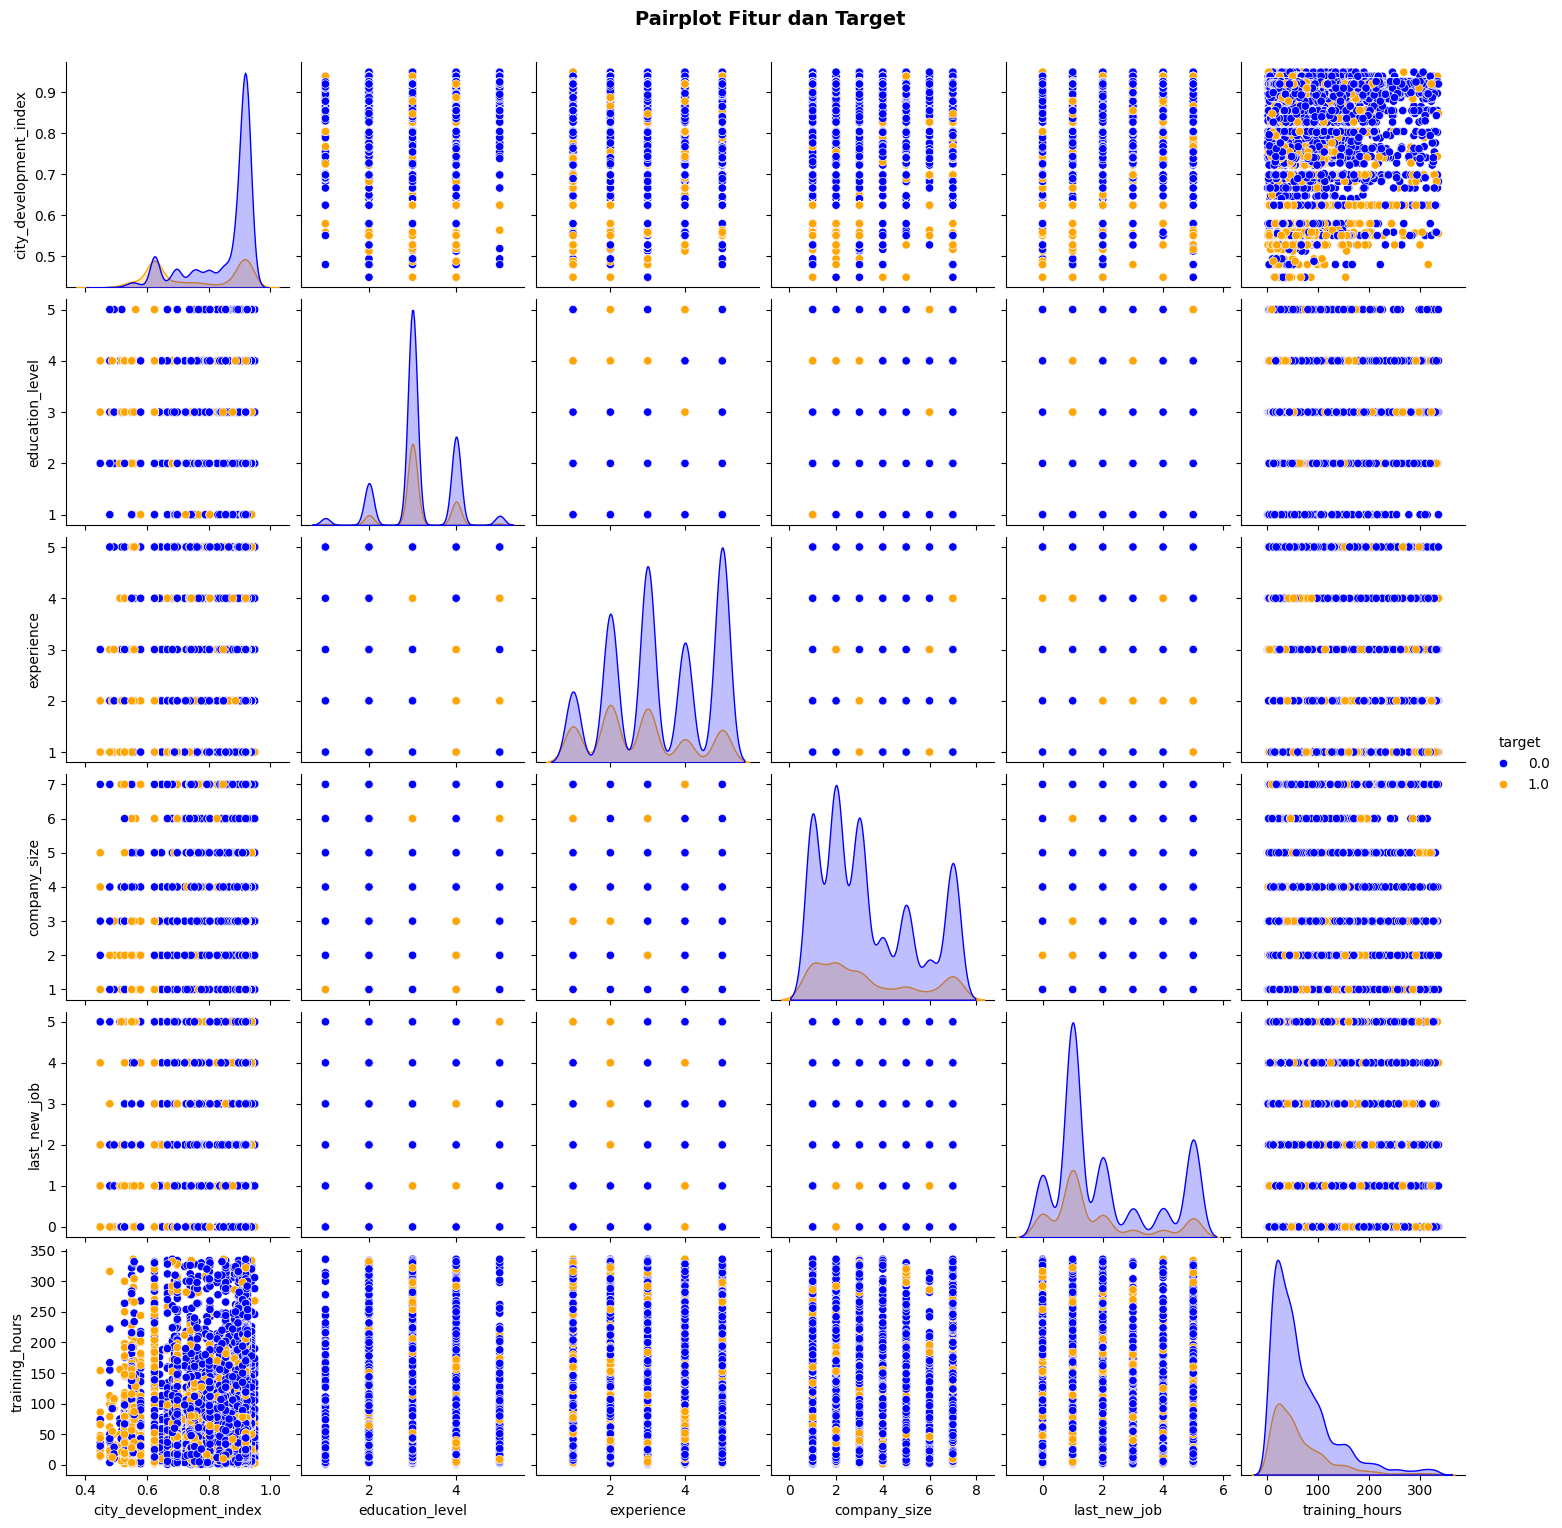

In [19]:

# Create a pair plot with different colors for 'Response' feature
pair_plot = sns.pairplot(df_temp[nums_temp], hue='target', palette={0: 'blue', 1: 'orange'})

# Adjust the figure title
plt.suptitle('Pairplot Fitur dan Target ', fontsize=14, weight='bold', y=1.02)

# Show the plot
plt.show()

### Plot Kategorikal

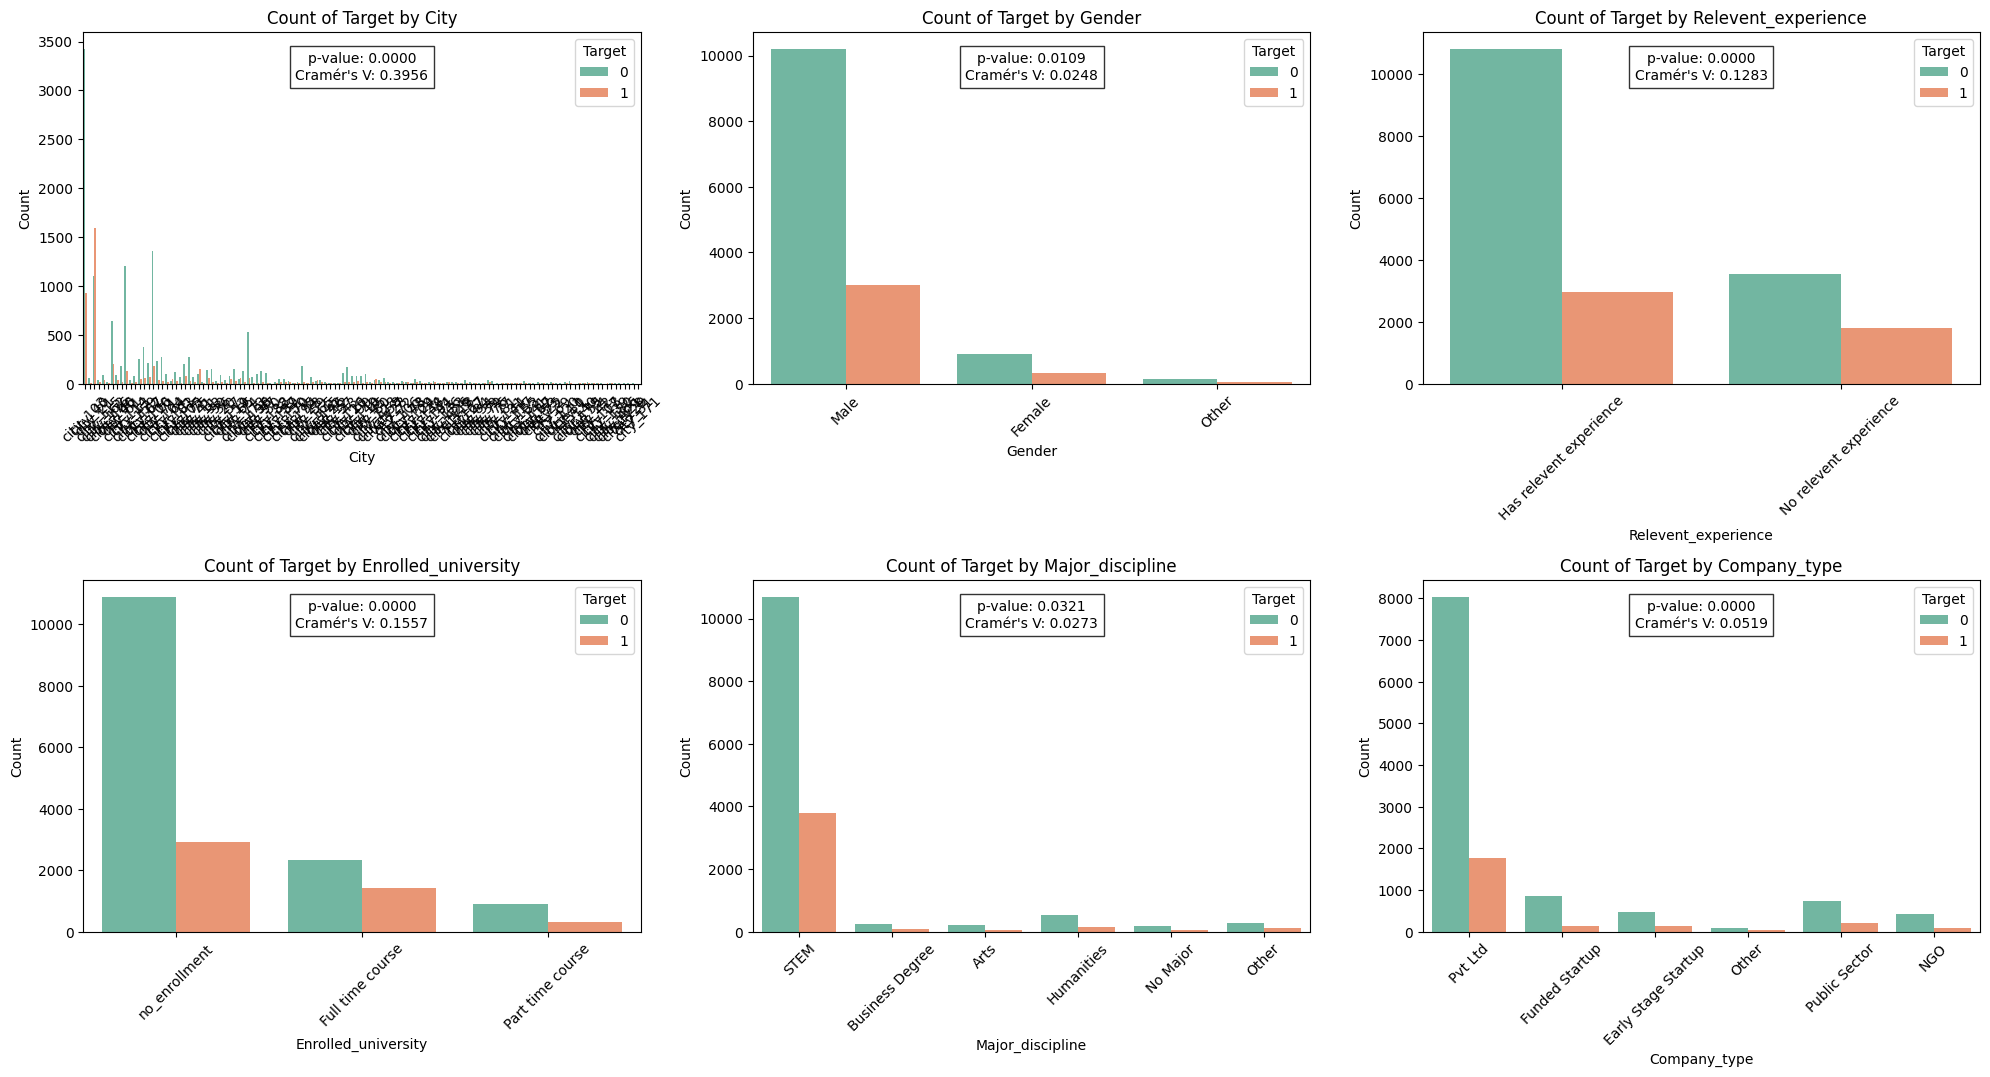

In [20]:
from scipy.stats import chi2_contingency

# Daftar fitur kategori
cats_temp = ['city', 'gender', 'relevent_experience', 'enrolled_university',
             'major_discipline', 'company_type']

plt.figure(figsize=(20, 15))

# Loop untuk setiap fitur dalam cats_temp
for i, feature in enumerate(cats_temp):
    # Membuat subplot untuk count plot
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_temp, x=feature, hue='target', palette='Set2')
    plt.title(f'Count of Target by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['0', '1'])
    plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat

    # Membuat tabel kontingensi
    crosstab = pd.crosstab(df_temp[feature], df_temp['target'])

    # Melakukan uji Chi-Square
    chi2, p, dof, expected = chi2_contingency(crosstab)

    # Menghitung nilai Cramér's V
    n = np.sum(crosstab.values)
    phi2 = chi2 / n
    r, k = crosstab.shape
    cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

    # Menambahkan p-value dan Cramér's V sebagai anotasi di plot
    plt.annotate(f'p-value: {p:.4f}\nCramér\'s V: {cramers_v:.4f}',
                 xy=(0.5, 0.9), xycoords='axes fraction',
                 fontsize=10, ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.8))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Menambahkan jarak antar grafik
plt.tight_layout()  # Mengatur layout
plt.show()

Observasi :
- Beberapa fitur kategorical menunjukkan p-value < 0.05 yang menunjukkan pengaruh signifikan terhadap target. Jika menggunakan fitur2 tersebut maka dapat dilakukan one hot encoding pada data pre processing

## 4.Business Insight


Berikut adalah beberapa business insights dari hasil Exploratory Data Analysis (EDA) di atas:

### 1. **Geografis Pengaruh Terhadap Pendaftaran**
   - Sebagian besar pendaftar berasal dari `city_103`, yang menunjukkan bahwa kota ini mungkin memiliki akses yang lebih baik ke program pelatihan atau peluang karier yang terkait. Tingginya ketertarikan dari kota ini bisa menunjukkan konsentrasi tenaga kerja yang membutuhkan pelatihan di wilayah perkotaan.
   - Pertimbangkan untuk meningkatkan pemasaran di kota dengan pengembangan rendah atau berupaya menyesuaikan program pelatihan agar lebih mudah diakses oleh penduduk di kota-kota yang kurang berkembang.

### 2. **Ketidakseimbangan Gender dalam Pendaftar**
   - Mayoritas pendaftar adalah pria, yang menunjukkan adanya kesenjangan gender dalam bidang yang ditekuni pendaftar atau bahkan dalam proses pendaftaran itu sendiri.
   - Program pelatihan dapat lebih menyasar kaum perempuan melalui kampanye inklusif atau menyediakan program khusus yang relevan bagi perempuan, yang bisa membantu mengurangi kesenjangan gender dan meningkatkan keanekaragaman dalam pelatihan.

### 3. **Pengalaman Relevan Mayoritas Pendaftar**
   - Sebagian besar pendaftar memiliki pengalaman yang relevan sebelumnya. Ini menandakan bahwa program ini menarik minat pekerja yang ingin menambah keterampilan daripada memulai karier baru.
   - Untuk memaksimalkan manfaat, pertimbangkan membuat jalur pelatihan atau modul yang lebih menantang bagi pendaftar dengan pengalaman relevan, serta jalur yang lebih dasar bagi mereka yang tanpa pengalaman sebelumnya.

### 4. **Status Pendidikan sebagai Indikator Minat dan Kebutuhan**
   - Sebagian besar pendaftar berpendidikan sarjana, dan cukup banyak yang memiliki gelar master. Hanya sedikit yang memiliki gelar PhD. Ini menunjukkan bahwa program ini mungkin lebih menarik bagi profesional di awal atau menengah karier.
   - Fokus pada pengembangan program pelatihan yang berorientasi pada profesional dengan latar belakang pendidikan sarjana atau master yang memerlukan peningkatan keterampilan atau transisi karier.

### 5. **Ketertarikan Pendaftar pada STEM**
   - Dominasi pendaftar dengan disiplin STEM menunjukkan bahwa program pelatihan lebih menarik bagi individu dengan latar belakang teknis.
   -Meningkatkan fokus pada keterampilan teknis yang lebih khusus, atau membuka jalur karier baru bagi profesional STEM. Atau, untuk memperluas demografi, program non-STEM bisa ditawarkan untuk menarik minat dari sektor berbeda.

### 6. **Variasi Pengalaman Kerja**
   - Pendaftar memiliki berbagai tingkat pengalaman, dengan sebagian besar pendaftar memiliki pengalaman kerja lebih dari 20 tahun. Hal ini menunjukkan bahwa program pelatihan ini menarik bagi individu dengan beragam latar belakang karier.
   - Rancang program yang fleksibel sesuai kebutuhan pendaftar di setiap tahap karier, baik yang baru memulai hingga yang senior. Program pelatihan yang tersegmentasi berdasarkan pengalaman dapat meningkatkan kepuasan dan relevansi program.

### 7. **Perusahaan Kecil-Medium sebagai Kontributor Utama Pendaftar**
   - Mayoritas pendaftar berasal dari perusahaan kecil hingga menengah, menunjukkan bahwa perusahaan-perusahaan ini mungkin memiliki kebutuhan lebih tinggi untuk meningkatkan keterampilan karyawan mereka.
   - Memperkenalkan program pelatihan yang disesuaikan untuk perusahaan kecil hingga menengah, atau bahkan menawarkan kemitraan pelatihan langsung dengan perusahaan-perusahaan ini bisa menjadi langkah strategis.

### 8. **Ketertarikan Pekerja Sektor Swasta yang Tinggi**
   - Sebagian besar pendaftar berasal dari perusahaan swasta. Hal ini menunjukkan bahwa sektor swasta lebih terbuka terhadap pengembangan karyawan melalui pelatihan eksternal.
   - Fokus pada perusahaan swasta untuk penawaran B2B, karena sektor ini lebih mungkin mencari peluang pelatihan dan pengembangan bagi karyawan mereka.

### 9. **Frekuensi Pergantian Pekerjaan Menunjukkan Mobilitas Karier Tinggi**
   - Sebagian besar pendaftar baru-baru ini berganti pekerjaan atau memiliki riwayat sering berganti pekerjaan, yang menandakan mobilitas karier tinggi di antara peserta.
   - Program pelatihan dapat dirancang untuk mendukung individu yang ingin bertransisi karier dengan keterampilan baru. Menciptakan modul yang relevan dengan kebutuhan pasar yang sedang berkembang atau spesialisasi niche juga bisa membantu mereka yang ingin berganti karier.

### 10. **Kelas Target yang Tidak Seimbang**
   - Ketidakseimbangan pada kolom `target`, dengan mayoritas adalah 0 (tidak pindah pekerjaan), menunjukkan tantangan dalam memprediksi kelas minoritas (1.0 atau pindah pekerjaan).
   - Metode balancing seperti oversampling atau undersampling disarankan untuk melatih model prediktif. Selain itu, strategi ini dapat membantu perusahaan dalam memahami dan memetakan pendaftar yang cenderung tertarik pada peluang baru.



## 5.Github Link Repository
[Finpro Link](https://github.com/Refdinal/insight-hustler)